>[Examen Diplomatura de Ciencias de Datos (Introducción a Python y Gestión de datos)](#scrollTo=AHONY2VzigaP)

>>[Datos del Grupo (Ingrese los datos de los miembros del grupo)](#scrollTo=F2tqo5cDpTwh)

>>[Criterio de evaluación](#scrollTo=0Uv0eAi_yqJM)

>>[Herramientas utilizadas](#scrollTo=X2C709eFqRDd)

>>[Carga de datos](#scrollTo=RzO8w1ysoR5P)

>>[Limpieza de datos](#scrollTo=KAjjl-EDoYZ_)

>>[Transformación de datos](#scrollTo=1Ht6Zro3oje8)

>>[Análisis y Visualizaciones](#scrollTo=-oZALeyloq56)

>>[Conclusión](#scrollTo=q7ppUWSYpA7A)

>>[Almacenamiento de resultados](#scrollTo=4nsbdrUgpL4k)



# Examen Diplomatura de Ciencias de Datos (Introducción a Python y Gestión de datos)

A continuación, se detallan las indicaciones para la resolución del examen. Tenga a bien leer todas las instrucciones y no dude en consultar si tiene alguna duda.

1. El examen se realiza de forma grupal comenzando el 2 de Mayo a las 6:30 PM. La defensa del mismo se realizará el día 9 de Mayo a las 6:30 PM. Como parte de la evaluación se ponderan tres conceptos, el desarrollo de la solución (Notebook), la defensa grupal y la presentación individual 
2. La fecha de entrega de trabajo es el Sábado 7 de Mayo a las 9:00 AM horas 
3. Tanto el código como el análisis y las visualizaciones se deben entregan en un notebook en formato **.ipynb**
4. Puede utilizar diferentes herramientas para el desarrollo como Jupyter, Colab, Spypder o VSCodium, sin embargo, el trabajo final debe ser entregado en un notebook como estipulado en el punto 3.
5. Como parte del ejercicio, se deberá operar al menos con un diccionario ya sea para carga de datos, gestión, o almacenamiento de los mismos.
6. Se deberan implementar funciones que reciban los parámetros adecuados y no posean strings implícitos dentro de la misma función.
7. Se deberan insertar al menos 10 filas con valores de películas randoms, preferentemente títulos nacionales que no se encuentren listados en el dataset. Los mismos pueden ser datos sintéticos.
8. Los trabajos deberán ser enviados por correo al cuerpo docente (1 por grupo).
9. Para visualizaciones se debe usar la librería **matplotlib** solamente, 
al menos 3 visualizaciones deben estar realizadas directamente sobre **matplotlib**
10. Los archivos a utilizar se encuentran almacenados en la siguiente URL:

**Dataset:** 

https://github.com/al34n1x/DataScience/blob/master/100.Examen/2022/netflix_titles.csv


---




## Datos del Grupo (Ingrese los datos de los miembros del grupo)

Nombre y Apellido | LU
------------------|---
Fernandez Guillermo German | 1157416
Pascuccio Jose Oscar | 1017995
Piñero Nicolas | 1158808
Szczur Diego | 1160772
Gamarra Zaira | 1155371




---




## Criterio de evaluación

Se les brindará un archivo el cual debe ser importado utilizando los métodos conocidos. Luego se procederá a realizar procesos simples de limpieza, gestión y transformaciones de datos con el objetivo de encontrar patrones y realizar visualizaciones.

Como parte del examen se evaluarán los siguientes conceptos:

* Importar datos desde fuentes externas
* Uso de funciones
* Gestión de diccionarios
* Documentación
* Limpieza de datos
* Gestión de datos y transformaciones
* Visualizaciones
* Almacenamiento de resultados

---



## **Descripción General**

El presente trabajo está basado en datos de películas y series del catálogo de Netflix hasta Septiembre de 2021. Los diferentes análisis realizados buscan encontrar patrones en cuanto a duración, fecha de subida a la plataforma, actores presentes, paises de producción, progresión de la adquisición de los mercados, entre otros.

---

## **Herramientas utilizadas**

A continuación detallen las herramientas utilizadas para el desarrollo del examen.

En el presente análisis de utilizaron las siguientes librerías:


*   Pandas, para el manejo de datos en formato DataFrame, y para lectura y almacenamiento de archivos CSV y Json
*   Matplotlib, para la visualización de los diferentes análisis propuestos
*   Numpy, para la generación de rangos en los ejes de los gráficos 









In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

## **Carga de datos**

Se define una función que toma por parámetro una ruta de archivo, el tipo de delimitador, y en caso de ser necesario, la cantidad de filas a ignorar al inicio de dicho archivo. Finalmente retorna un DataFrame con los datos. 
En este caso en particular, fue necesario eliminar las primeras 23 filas del archivo original.

In [ ]:
def cargaDatacsv(path,delimiter,skip=None):#Armo funcion para cargar los datos paso 3 parametros path(ruta del archivo), delimeter(que me delimita los rows) & skip (la cantidad de filas que quiero saltear).
  df = pd.read_csv(path, sep = delimiter,skiprows=skip)
  return df

#seteo variables a usar en la creacion del DF inicial.
path='https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/netflix_titles.csv'
delimiter=','
rows_to_skip=23#al revisar el archivo vimos que habia 23 linas corruptas al principio del mismo.

df_Netflix=cargaDatacsv(path,delimiter,rows_to_skip)
df_Netflix.head(100)

NameError: ignored

---

## **Ingreso de nuevos registros al Data Frame**

Se ingresará un listado de nuevas películas provenientes de un archivo CSV (registrosnuevos.csv). Allí están todas las columnas a ingresar excepto el id de la película (se construirá a partir del último id detectado en el listado original).
Para el ingreso de estas nuevas películas se genera una función que recibe el listado original como DF, el path del archivo CSV (que contiene la lista de las películas nuevas) y el separador utilizado en el archivo CSV. La función agrega las nuevas películas al final y devuelve el DF completo.

In [ ]:
def ingresarregistros(df, arch_registros, delimiter=','):
  # Cargo el archivo señalado arch_registros en un nuevo DF
  dfreg = pd.read_csv (arch_registros, delimiter=delimiter)
  
  # Busco el último ID del DF total y genero de alli en adelante
  idmax = 0
  for i in df.index:
    idleido = df['show_id'][i]
    # Saco la s y transformo en entero
    idint = int(idleido.replace('s', ''))
    if idint > idmax:
      idmax = idint

  idmax = idmax + 1
  for i in dfreg.index:
    dfreg.loc[i,'show_id'] = 's' + str(idmax)
    idmax = idmax + 1

  # Obtengo un DF con los títulos agregados
  df2=df.append(dfreg, ignore_index=True)

  return df2

dftotal = ingresarregistros (df_Netflix, './sample_data/registrosnuevos.csv', ',')
dftotal.tail(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,Movie,Kraftwerk - Minimum-Maximum,NaN,"Ralf Hutter, Florian Schneider, Fritz Hilpert,...",Germany,"September 10, 2019",2005,PG,126 min,"Music & Musicals, Music concert",Kraftwerk Live 2004
8808,s8809,Movie,Kraftwerk - Ready Player Two,NaN,"Ralf Hutter, Florian Schneider",Germany,"September 22, 2020",2020,PG,180 min,"Documentaries, Music & Musicals",Kraftwerk documentary
8809,s8810,Movie,Oasis - Live from Manchester,Dick Carruthers,Oasis,United Kindom,"January 10, 2019",2007,PG,74 min,"Music & Musicals, Music concert",NaN
8810,s8811,Movie,Rage Against The Machine Live At Finsbury Park,NaN,Rage Against The Machine,United Kindom,"October 20, 2021",2015,PG,68 min,"Music & Musicals, Music concert","London's Finsbury Park on June 6th, 2010"
8811,s8812,Movie,Led Zeppelin The Song Remains the Same,"Peter Clifton, Joe Massot","Robert Plant, Jimmy Page, John Bonham, John Pa...",United Kindom,"November 14, 2020",2008,PG,128 min,"Music & Musicals, Music concert",NaN


---

## **Limpieza de datos**

A continuación de realiza una limpieza y transformación inicial de los datos:


*   Estandarización de las fechas y transformación a tipo Date
*   Conversión de los NaN a 'NoData'
*   Conversión de strings a integer en los años de estreno
*   Eliminación de registros con datos incompletos
*   Renombrado de columnas
*   Generación de nuevas columnas, útiles para los análisis










In [ ]:

df_netflix_clean=dftotal.copy() #hago un copy para no laburar sobre la misma posición de memoria - no sobre-escribir.
df_netflix_clean['date_added']=pd.to_datetime(df_netflix_clean['date_added']).dt.date #Cambio formato de la columna date_added, para llevar todas las fechas al mismo formato de fecha 'YYYY-MM-DD'.
df_netflix_clean.fillna('NoData', inplace=True) #implace=true labura sobre el mismo objecto memoria
#limpio los NaN, asigno 'NoData'.

df_netflix_clean.drop(df_netflix_clean[df_netflix_clean.date_added == 'NoData'].index, inplace=True)
df_netflix_clean.drop(df_netflix_clean[df_netflix_clean.release_year == 'NoData'].index, inplace=True)
#borro los registros de date_added & ReleaseYear que tienen NoData, nos generan problemas y no creemos que sea util setear la fecha en 1900-01-01 o 1900 respectivamente.

df_netflix_clean['release_year'] = df_netflix_clean['release_year'].astype(int) #casteo a INT la columna release_year.
df_netflix_clean['date_added']=pd.to_datetime(df_netflix_clean['date_added'], format="%Y/%m/%d")#casteo a datetime la columna date_added.

df_netflix_clean.rename(columns = {'show_id':'id','type':'tipo', 'title':'titulo','cast':'reparto','country':'pais','date_added':'fecha_netflix','release_year':'fecha_estreno','rating':'clasificacion','duration':'duracion','listed_in':'listado','description':'descripcion'}, inplace = True)
#renombro las columnas.

#Generamos 2 columnas derivadas dependiendo si el registro corresponde a pelicula o serie.
serieMovie=df_netflix_clean['tipo'] == 'Movie' #1.a Se genera una serie con los booleanos donde el tipo es pelicula.
df_netflix_clean["pelicula_flag"] = 0 #genero una columna nueva donde le asigno a todos los valores 0. 
df_netflix_clean.loc[serieMovie, 'pelicula_flag'] = 1 #utilizando la serie generada previamente le asigno 1 a los indices que corresponden a peliculas. 
df_netflix_clean['duracion_pelicula']=df_netflix_clean.loc[serieMovie,'duracion']  #genero una columna nueva y con la funcion loc uso la serie 'serieMovie' para asignarle los valores 
                                                                #de la columna duracion.
serieTV=df_netflix_clean['tipo'] == 'TV Show' #Misma logica pero para Series y la nueva columna es temporadas.
df_netflix_clean['temporadas']=df_netflix_clean.loc[serieTV,'duracion']
df_netflix_clean.fillna('NoData', inplace=True)

df_netflix_clean['duracion_pelicula']=df_netflix_clean['duracion_pelicula'].str.split(' ',expand=True)[0]# con la funcion split separo espacios y los pongo en columnna con el parametro expand=true.
df_netflix_clean['temporadas']=df_netflix_clean['temporadas'].str.split(' ',expand=True)[0]             # y de esas columnas selecciono la primera.

df_netflix_clean.head()

,id,tipo,titulo,director,reparto,pais,fecha_netflix,fecha_estreno,clasificacion,duracion,listado,descripcion,pelicula_flag,duracion_pelicula,temporadas
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoData,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,90,NoData
1,s2,TV Show,Blood & Water,NoData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,NoData,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NoData,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,NoData,1
3,s4,TV Show,Jailbirds New Orleans,NoData,NoData,NoData,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,NoData,1
4,s5,TV Show,Kota Factory,NoData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,NoData,2


---

## **Transformación de datos**

Definimos una función que toma por parámetro un DataFrame, y una serie de parámetros no obligatorios para generar un nuevo DataFrame.

*   Dict_filtros: diccionario donde las keys representan las columas sobre las cuales se desea hacer filtros
*   listaColumns: lista donde se indican las columnas que debe tener el DataFrame a generar
*   fecha_inicio: string en formato 'YYYY-mm-dd' indicando la fecha a partir de la cual se desean los datos
*   fecha_fin: string en formato 'YYYY-mm-dd' indicando la fecha hasta la cual se desean los datos





In [ ]:

def filtro_df(df_param,dict_filtros=None,listaColumns=None,fecha_inicio=None,fecha_fin=None):
  
  new_df=df_param.copy() #Hago un copy para no laburar sobre la misma posición de memoria - no sobre-escribir.
  cnt_filtros=0 #Declaro variables para contar el paso de filtros y si hay errores.
  error=0
  
  try:        #uso bloques try 
    if dict_filtros!=None:
      for k,v in dict_filtros.items():#Recorro el diccionario de filtros donde la key es el nombre de la columna y la lista en values, los valores que queremos buscar.
        var='|'.join(v) #Armo variable str que contiene los valores EJ:'Argentina|Chile'.
        if cnt_filtros==0:
          new_df1=df_param[df_param[k].str.contains(var, na=False)]#en la primera pasada asigno todos los valores encontrados para var en la columna k.
          new_df=new_df1.copy()
          cnt_filtros=1
        else:    
          df_2=df_param[df_param[k].str.contains(var, na=False)]# en la segunda pasada en lugar de 'pisar' el dataframe, genero un segundo.
          new_df=new_df.append(df_2)      #con este segundo dataframe genero un append que agrega al primer df los valores encontrados.

    new_df.drop_duplicates(inplace = True)#elimino posibles duplicados.
  except:
      print("No existe la columna de diccionario")#si sale por la exception, print mensaje.
      error=1
      new_df=pd.DataFrame()#set el df vacio para no devolver ningun valor.

  try:  #bloque try para filtrar fechas.
    if error==0:    #pregunto si la variable errores es cero, porque en el caso contrario no deberia seguir la funcion.
      if fecha_inicio!=None:
        new_df=new_df[(new_df['fecha_netflix'] >= fecha_inicio)] 
      if fecha_fin!=None:
         new_df=new_df[(new_df['fecha_netflix'] <= fecha_fin)]#Solo filtro las fechas en el caso que la variable no sea None.
  except:
    error=1
    print('revisa el formato de fecha')
    new_df=pd.DataFrame()
  
  try: #bloque try para seleccionar las columnas.
    if error==0:
      if listaColumns!=None:
        new_df = new_df[listaColumns] #Si la variable listaColumns existe, genera 'pisa' DF con las columnas seleccionadas.
  except:
      error=1
      new_df=pd.DataFrame()
      print("No existe la columna")
      for i in listaColumns:      #Itero en las lista listacolumns para printear que columna es la que te esta generando problemas.
        if i not in new_df.columns:
          print(i)           
  
  new_df.reset_index(drop=True,inplace=True)

  return new_df

---

## **Análisis y Visualizaciones**



## **Películas vs Series agregadas a Netflix (2015 -2021)**

Se considera la hipotesis inicial de que el agregado de películas y series a Netflix se incrementó durante 2020 y 2021 debido a la cuarentena por la pandemia de Covid-19, tiempo durante el cual las personas permaneciaron en sus domicilios. Es por esto que se decide comparar desde 2014 en adelante para ver como es la tendencia prepandemia y durante la misma.



<function matplotlib.pyplot.show>

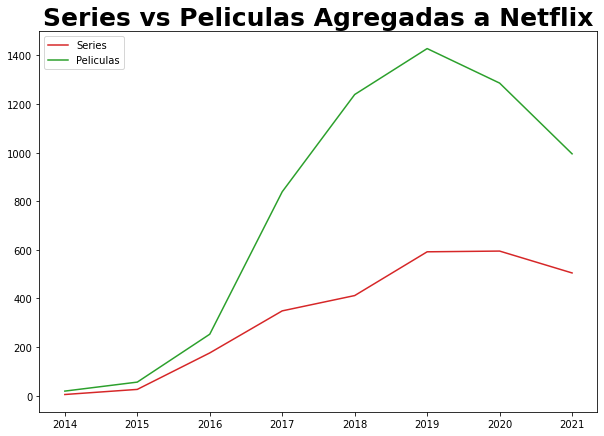

In [ ]:
#definición en variables de los datos que serán argumentos de la función 'filtro_df()'
fh_inicio = '2014-01-01'
columns = ['fecha_netflix', 'pelicula_flag',]

#generación del DF filtrado, en este caso desde 2015 en adelante y compuesto solo por las columnas 'fecha_netflix' y 'pelicula_flag'
df_Netflix_filtrado = filtro_df(df_netflix_clean, None, columns, fh_inicio, None)

#para este análisis solo es necesario el año de la fecha de agregado.
#generación de la columna con el dato.
df_Netflix_filtrado['año_netflix'] = pd.DatetimeIndex(df_Netflix_filtrado['fecha_netflix']).year

#eliminación de la columna con fecha completa
del df_Netflix_filtrado['fecha_netflix']

#definición de dos DF, uno de peliculas y uno de series
df_peliculas = df_Netflix_filtrado[df_Netflix_filtrado['pelicula_flag'] == 1]
df_series = df_Netflix_filtrado[df_Netflix_filtrado['pelicula_flag'] == 0]

#reindexación de ambos DF tomando el año como tal
df_peliculas.set_index(['año_netflix'], inplace = True)
df_series.set_index(['año_netflix'], inplace = True)

#definición en variables de los datos que serán argumentos de la función 'filtro_df()'
df_peliculas = df_peliculas.groupby([df_peliculas.index]).count()
df_series = df_series.groupby([df_series.index]).count()

#ploteo
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(df_series['pelicula_flag'], color = 'tab:red', label = 'Series')
ax.plot(df_peliculas['pelicula_flag'], color = 'tab:green', label = 'Peliculas')
ax.set_title('Series vs Peliculas Agregadas a Netflix', loc = "Center", fontdict = {'fontsize': 25, 'fontweight': 'bold', 'color': 'k'})
ax.legend(loc = 'upper left')
plt.show

### **Conclusión del Análisis: Películas vs Series agregadas a Netflix (2015 -2021)**

Vemos que, a diferencia de la hipótesis inicial del análisis, la tendencia en el agregado de series y películas durante la pandemia no aumentó, sino que disminuyó.
En ambos casos, desde el año 2014, se ve un gran incremento en el agregado a Netflix hasta 2019, pero luego una disminución, que en el caso de las películas es muy abrupta y en el caso de las series es considerablemete mas suave.
Con este resultado y analizando un panorama más amplio podemos decir que a partir de 2019 hubo un auge en el lanzamiento de nuevas plataformas de streaming, y esta podría ser la principal causa por la que Netflix haya disminuido su agregado de serie y películas desde entonces. Es decir, que durante la cuarentena de 2020 y 2021 era mayor la oferta de plataformas digitales, en comparación a años anteriores donde el mercado estaba practicamente monopolizado por Netflix.



---

## **Análisis de Actores en el catálogo de Netflix**

Se analizará qué actores aparecen con mayor frecuencia en todo el catálogo y se graficará los 20 actores con mayor frecuencia.
Se recorrerá todo el DataFrame para detectar todos los actores que aparecen nombrados en la Columna **reparto** (separando los varios actores que pueda haber en el campo separados por coma). Se recorre la lista resultante y cuando aparece uno actor nuevo se lo agrega al **diccionario de actores** y en un diccionario anidado se contarán la cantidad de películas y las películas (separadas por comas) de dicho actor. Con el diccionario resultante se lo pasa a un DF y se lo ordena y grafica.


Total películas: 8807
Películas con información de casting: 7982 (90 %)
Actores registrados: 36406



<Figure size 432x288 with 0 Axes>

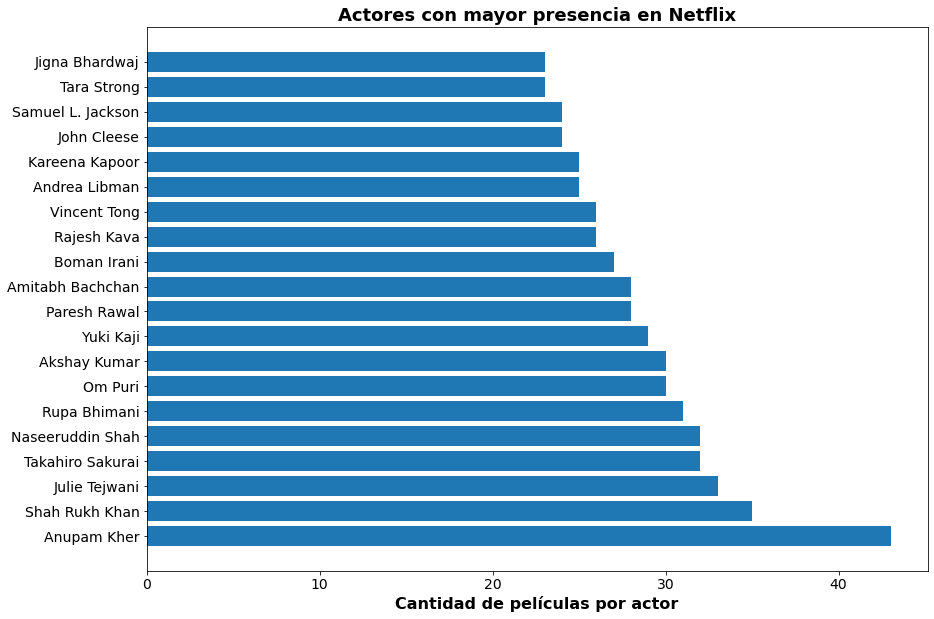

In [ ]:
totpel = len(df_netflix_clean.index)
print('Total películas: ' + str(totpel))

# Pido las columnas que necesito con la función filtro_df
dfcast = filtro_df (df_netflix_clean, listaColumns=['titulo','reparto'])
dfcast
# Flitro el DF sin incluir los registros con cast = NoData
dfcast = dfcast[dfcast['reparto'] != 'NoData']
totcas = len(dfcast.index)
print('Películas con información de casting: ' + str(totcas) + ' (' + str(int(100*totcas/totpel)) + ' %)' )

# Recorro todo el DF para detectar todos los actores que aparecen nombrados en la Columna cast
# Cuando aparece uno actor nuevo se lo agrega al diccionario y en un dicc anidado se contarán la cantidad
# de películas y las películas (separadas por comas) de dicho actor.
dicact = {}
dic2 = {}
for i in dfcast.index:
  strcast = dfcast['reparto'][i]
  # Splits at ','
  lisactores = strcast.split(',')
  # Se recorre la lista de actores
  for j in lisactores:
    actor = ''
    actor = j.strip()
    actor = actor.title()
    if actor != '':
      # Busco si el actor ya está en el diccionario y sumo la película a los datos
      if dicact.get(actor) != None:
        dicact[actor]['Cantidad'] = dicact[actor]['Cantidad'] + 1
        dicact[actor]['Peliculas'] = dicact[actor]['Peliculas'] + ', ' + dfcast['titulo'][i].strip().replace(',', '')
      else:
        dic2 = {}
        dic2['Cantidad'] = 1
        dic2['Peliculas'] = dfcast['titulo'][i].strip().replace(',', '')
        dicact[actor] = dic2

# Se asigna el diccionario de actores y películas a un DF
dfact = pd.DataFrame(dicact)
dfact = dfact.T
# Se ordena por cantidad descendente
dford = dfact.sort_values(by=['Cantidad'], ascending = False)
dford.index.name = 'Actor'
# Guardo estos resultados en actores.csv
dford.to_csv('./sample_data/actores.csv')

print('Actores registrados: ' + str(len(dford.index)))
print()

# Se grafican barras horizontales mostrando los 20 actores con mayor presencia en Netflix
x1_val = dford.index[:20]
y1_val = dford['Cantidad'][:20]

fig1 = plt.figure()
fig1, ax1 = plt.subplots(1, 1,figsize=(14, 10))
ax1.barh(x1_val, y1_val)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax1.set_xlabel('Cantidad de películas por actor', fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'k'})
ax1.set_title('Actores con mayor presencia en Netflix', loc = "center", fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'k'})
plt.show()


### **Conclusión del Análisis: Actores en el catálogo de Netflix**

Teniendo en cuenta que Netflix tiene una base muy amplia de público el resultado esperado es tener a las actrices y actores ampliamente conocidos y famosos como los 20 con mayor presencia. El resultado es exactamente el opuesto: la mayoría de los actores con más películas son desconocidos en el mundo occidental y son de países asiáticos, principalmente India. En otro análisis se verá qué países tienen mayor presencia en Netflix.

---

## **Análisis de Países en el catálogo de Netflix**

Alentado por el resultado anterior (actores en Netflix) se analizará qué países aparecen con mayor frecuencia en todo el catálogo y se graficará los 20 paises con mayor frecuencia.
Se recorrerá todo el Dataframe para detectar todos los países que aparecen nombrados en la Columna **pais** (separando los varios países que pueda haber en el campo separados por coma). Se recorre la lista resultante y cuando aparece uno país nuevo se lo agrega al **diccionario de países** y se contarán la cantidad de películas de dicho país. Con el diccionario resultante se lo pasa a un DF y se lo ordena y grafica.

Total películas: 8817
Películas con información de origen: 7977 (90 %)
Países analizados: 123



<Figure size 432x288 with 0 Axes>

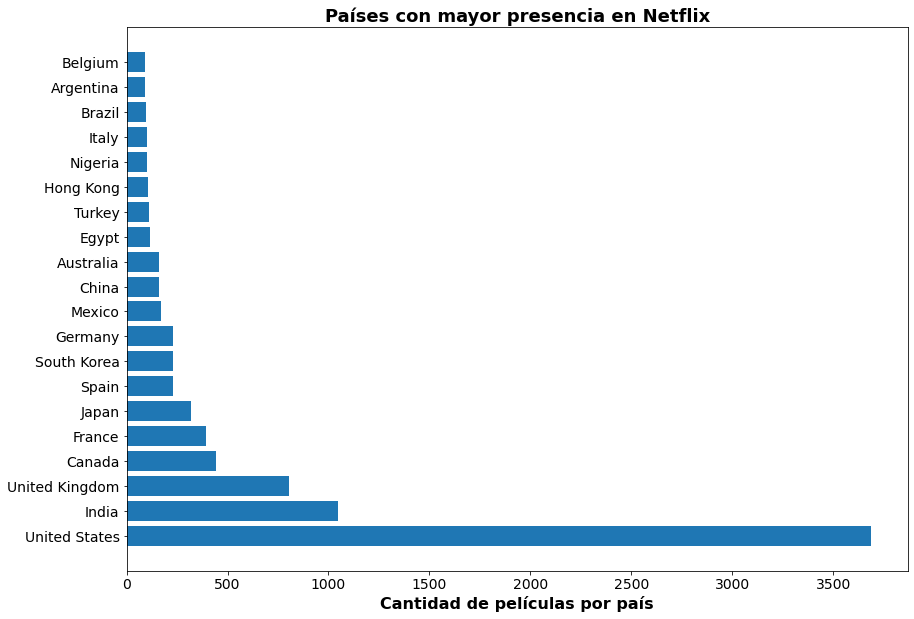

In [ ]:
totpel = len(dftotal.index)
print('Total películas: ' + str(totpel))

# Pido las columnas que necesito con la función filtro_df
dfcast = filtro_df (df_netflix_clean, listaColumns=['pais'])

# Flitro el DF sin incluir los registros con country = NoData
dfpai = dfcast[dfcast['pais'] != 'NoData']
totpai = len(dfpai.index)
print('Películas con información de origen: ' + str(totpai) + ' (' + str(int(100*totpai/totpel)) + ' %)' )

# Recorro todo el DF para detectar todos los países que aparecen nombrados en la Columna country
# Cuando aparece un país nuevo se lo agrega al diccionario y se contarán la cantidad de películas de ese país.
dicpai = {}
dic2 = {}
for i in dfpai.index:
  strpai = dfpai['pais'][i]
  # Splits at ','
  lispai = strpai.split(',')
  # Se recorre la lista de países
  for j in lispai:
    pais = ''
    pais = j.strip()
    pais = pais.title()
    if pais != '':
      # Busco si el pais ya está en el diccionario y sumo la película a los datos
      if dicpai.get(pais) != None:
        dicpai[pais] = dicpai[pais] + 1
      else:
        dicpai[pais] = 1

# Se asigna el diccionario de paises a una Serie
serpai = pd.Series(dicpai)
# Se ordena por cantidad descendente
serord = serpai.sort_values(ascending = False)
serord.index.name = 'País'
# Guardo estos resultados en paises.csv
serord.to_csv('./sample_data/paises.csv')

print('Países analizados: ' + str(len(serord.index)))
print()

# Se grafican barras horizontales mostrando los 20 paises con mas peliculas en Netflix
x2_val = serord.index[:20]
y2_val = serord[:20]

fig2 = plt.figure()
fig2, ax2 = plt.subplots(1, 1,figsize=(14, 10))
ax2.barh(x2_val, y2_val)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2.set_xlabel('Cantidad de películas por país', fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'k'})
ax2.set_title('Países con mayor presencia en Netflix', loc = "center", fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'k'})
plt.show()


### **Conclusión del Análisis: Países en el catálogo de Netflix**

En este caso los resultados son los esperados: EEUU tiene el liderazgo absoluto en la producción de cine y series (3690 películas, 49% del total). En segundo lugar se encuentra India (con 1046 películas) y esto explica en parte la gran cantidad de actores indios entre los más frecuentes. Evidentemente hay una gran cantidad de producción india (13% del total) y un puñado de actores indios aparecen en muchas de ellas haciendo muy fuerte su presencia. El resto de los países se reparten el 38% restante.

---

## **Análisis de Actores Filtrado**

Por último se analizará qué actores aparecen con mayor frecuencia en todo el catálogo no teniendo en cuenta las películas de la India ni películas animadas (varios actores del diagrama anterior con actores de voces en animación).
Se filtrará el DF original eliminando las películas antedichas. Finalmente se grafica los 20 actores con mayor presencia de este nuevo grupo.


Total películas: 8817
Películas con información de casting: 6041 (68 %)
Actores registrados: 29551



<Figure size 432x288 with 0 Axes>

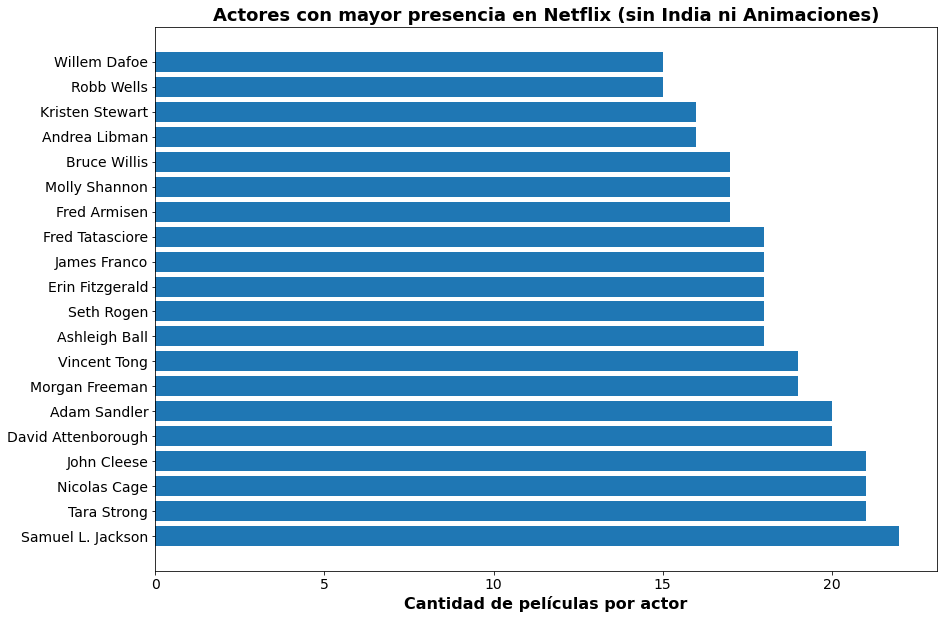

In [ ]:
totpel = len(dftotal.index)
print('Total películas: ' + str(totpel))

# Pido las columnas que necesito con la función filtro_df
dfcast4 = filtro_df (df_netflix_clean, listaColumns=['titulo','reparto','pais','listado','descripcion'])

# Flitro el DF sin incluir los registros con cast = NoData
dfcast4 = dfcast4[(dfcast4['reparto'] != 'NoData')]
# Flitro el DF sin incluir los registros con country = NoData
dfcast3 = dfcast4[dfcast4['pais'] != 'NoData']
# Flitro el DF sin incluir los registros con country = India
dfcast2 = dfcast3[~dfcast3.pais.str.contains('India')]
# Flitro el DF sin incluir los registros con referencias a animaciones
dfcast1 = dfcast2[~dfcast2.listado.str.contains('Anime')]
dfcast = dfcast1[~dfcast1.descripcion.str.contains('animat')]
totcas = len(dfcast.index)
print('Películas con información de casting: ' + str(totcas) + ' (' + str(int(100*totcas/totpel)) + ' %)' )

# Recorro todo el DF para detectar todos los actores que aparecen nombrados en la Columna cast
# Cuando aparece uno actor nuevo se lo agrega al diccionario y en un dicc anidado se contarán la cantidad
# de películas y las películas (separadas por comas) de dicho actor.
dicact = {}
dic2 = {}
for i in dfcast.index:
  strcast = dfcast['reparto'][i]
  # Splits at ','
  lisactores = strcast.split(',')
  # Se recorre la lista de actores
  for j in lisactores:
    actor = ''
    actor = j.strip()
    actor = actor.title()
    if actor != '':
      # Busco si el actor ya está en el diccionario y sumo la película a los datos
      if dicact.get(actor) != None:
        dicact[actor]['Cantidad'] = dicact[actor]['Cantidad'] + 1
        dicact[actor]['Peliculas'] = dicact[actor]['Peliculas'] + ', ' + dfcast['titulo'][i].strip().replace(',', '')
      else:
        dic2 = {}
        dic2['Cantidad'] = 1
        dic2['Peliculas'] = dfcast['titulo'][i].strip().replace(',', '')
        dicact[actor] = dic2

# Se asigna el diccionario de actores y películas a un DF
dfact = pd.DataFrame(dicact)
dfact = dfact.T
# Se ordena por cantidad descendente
dford = dfact.sort_values(by=['Cantidad'], ascending = False)
dford.index.name = 'Actor'

print('Actores registrados: ' + str(len(dford.index)))
print()

# Se grafican barras horizontales mostrando los 20 actores con mayor presencia en Netflix
x1_val = dford.index[:20]
y1_val = dford['Cantidad'][:20]

fig1 = plt.figure()
fig1, ax1 = plt.subplots(1, 1,figsize=(14, 10))
ax1.barh(x1_val, y1_val)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax1.set_xlabel('Cantidad de películas por actor', fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'k'})
ax1.set_title('Actores con mayor presencia en Netflix (sin India ni Animaciones)', loc = "center", fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'k'})
plt.show()


### **Conclusión del Análisis: Actores Filtrado**

Ahora sí el resultado es lo esperado: la mayoría de los actores listados con mayor presencia son actrices y actores ampliamente conocidos y famosos en el mundo occidental.

---

## **Series agregadas sin continuidad**

Partimos de la percepcion que en los ultimos años se produjeron gran cantidad de series de las cuales aparentemente muchas fueron abandonadas por diversos motivos (falta de audiencia, problemas de produccion, alto costo, etc).
Para realizar el analisis filtraremos el set de datos exclusivamente con los registros donde la duracion sea Una Temporada (1 Season), y adicionalmente seleccionaremos solo aquellas entradas que existan en la plataforma hasta fines del año 2019; asumiendo que una Serie que posea solo una temporada y hayan pasado mas de 2 años, ya no tendra continuidad.
Adicionalmente, debido al hecho de no poseer una columna donde claramente este indicada la clasificacion de la Serie, nos basaremos en la columna **listado** para sacar del set de estudio aquellas series indicadas como Documentales, Reality Shows y Docuserie para tener un espacio mas acotado a lo que queremos observar.

<function matplotlib.pyplot.show>

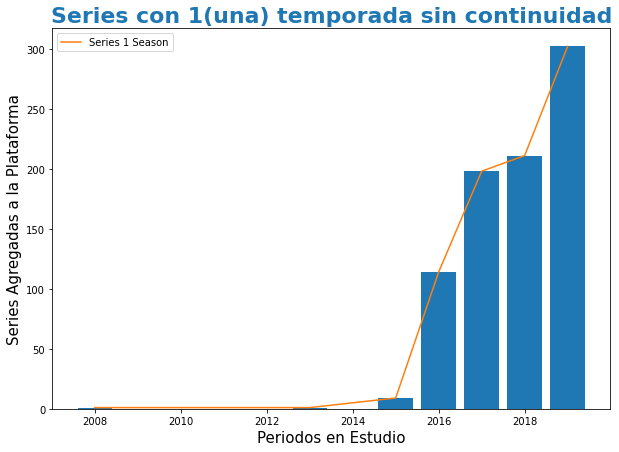

In [ ]:
dict_filtros={'duracion':['1 Season']}
lista_columnas=['fecha_netflix','listado']

#   Filtro los registros en base a los datos de interes, extraigo año de la Fecha de inclusion generando una nueva columna
#   limito el dataset a los menores al año 2020 y hago que el indice sea la columna de Año
df_Netflix_filtrado=filtro_df(df_netflix_clean,dict_filtros,lista_columnas)
df_Netflix_filtrado['year'] = pd.DatetimeIndex(df_Netflix_filtrado['fecha_netflix']).year
df_Netflix_filtrado=df_Netflix_filtrado[df_Netflix_filtrado['year']<2020]
df_Netflix_filtrado.set_index(['year'],inplace=True)


#   Saco de los registros que se asumen NO considerados series convencionales;
#   luego agrupo los registros por años y que deja la cuenta de registros correspondientes 
df_Netflix_filtrado=df_Netflix_filtrado[~df_Netflix_filtrado.listado.str.contains('Documentaries')]
df_Netflix_filtrado=df_Netflix_filtrado[~df_Netflix_filtrado.listado.str.contains('Reality TV')]
df_Netflix_filtrado=df_Netflix_filtrado[~df_Netflix_filtrado.listado.str.contains('Docuseries')]

df_Netflix_filtrado=df_Netflix_filtrado.groupby([df_Netflix_filtrado.index]).count()

#   Genero el grafico
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_Netflix_filtrado['fecha_netflix'],label='Series 1 Season',color="tab:orange")
ax.bar(df_Netflix_filtrado.index,df_Netflix_filtrado['fecha_netflix'])
ax.set_title('Series con 1(una) temporada sin continuidad', loc = "Center", fontdict = {'fontsize':22, 'fontweight':'bold', 'color':'tab:blue'})
ax.legend(loc = 'upper left')
plt.xlabel("Periodos en Estudio",fontsize=15)
plt.ylabel("Series Agregadas a la Plataforma",fontsize=15)
plt.show

### **Conclusión del Análisis: Series agregadas sin continuidad**

Como podemos observar, a partir del año 2016 (que adicionalmente coincide con los años de crecimiento general en adquisición y producción de series por la plataforma) vemos que incrementa constantemente el numero de series con solo una temporada existente.
A pesar de que para poder sacar una conclusión absoluta sobre la demostración de nuestra teoría, necesitariamos una mayor cantidad de datos (como por ejemplo la clasificación real de cada serie, la expectativa inicial de continuidad para cada una, etc) a los fines estadísticos podemos afirmar que la tendencia nos muestra un crecimiento en aquellos productos que quizás, al no cumplir con expectativas comerciales, dejan de producirse o comercializarse a traves de la plataforma en estudio.

---

## **Análisis comparativo de adquisición de películas y series Argentinas**

Nos interesa entender a partir del análisis de los datos con los que contamos, cual fue la progresión de películas y series argentinas agregadas a la plataforma en estudio.
Entendemos que Argentina no es un mercado que produzca mucho contenido, pero aún así es interesante entender el comportamiento de la plataforma.
Para eso partiremos del set de datos general, filtratemos aquellos registros donde Argentina sea parte productora (incluyendo coproducciones con otros países) y finalmente para el estudio, tomaremos la información para todos los períodos con los que contamos (histórico año a año).
Generaremos dos sets de datos diferentes: uno que contenga exclusivamente las películas y el otro las series, de manera que podamos comparar progresión de ambas.

<function matplotlib.pyplot.show>

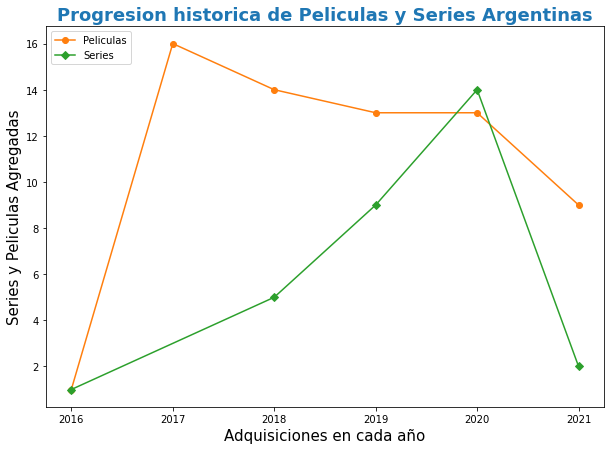

In [ ]:
dict_filtros={'pais':['Brazil']}
lista_columnas=['fecha_netflix','tipo']

#   Filtro los registros en base a los datos de interes, extraigo año de la Fecha de inclusion generando una nueva columna
#   y hago que el indice sea la columna de Año
df_Netflix_filtrado=filtro_df(df_netflix_clean,dict_filtros,lista_columnas)
df_Netflix_filtrado['year'] = pd.DatetimeIndex(df_Netflix_filtrado['fecha_netflix']).year
df_Netflix_filtrado.set_index(['year'],inplace=True)

#   Genero dos dataframes correspondientes a la lista de Peliculas y Series para Argentina. Agrupo por año y cuento los registros correspondientes 
df_Arg_peliculas=df_Netflix_filtrado[df_Netflix_filtrado['tipo']=='Movie']    #Sub DataFrame utilizado para las Peliculas 
df_Arg_peliculas=df_Arg_peliculas.groupby([df_Arg_peliculas.index]).count()

df_Arg_series=df_Netflix_filtrado[df_Netflix_filtrado['tipo']=='TV Show']     #Sub DataFrame utilizado para las Series
df_Arg_series=df_Arg_series.groupby([df_Arg_series.index]).count()

#   Genero el grafico
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_Arg_peliculas['fecha_netflix'],label='Peliculas',color="tab:orange",marker = 'o')
ax.plot(df_Arg_series['fecha_netflix'],label='Series',color="tab:green",marker = 'D')
ax.set_title('Progresion historica de Peliculas y Series Argentinas', loc = "Center", fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'tab:blue'})
ax.legend(loc = 'upper left')
plt.xlabel("Adquisiciones en cada año",fontsize=15)
plt.ylabel("Series y Peliculas Agregadas",fontsize=15)
plt.show

### **Conclusión del Análisis: Análisis comparativo de adquisición de películas y series Argentinas**
En principio, el gráfico nos muestra claramente que Argentina no es un mercado muy atractivo para la plataforma, ya que no posee gran cantidad de material.
Recién en el año 2016 podemos observar producciones agregadas y a partir de ese año, comienza un crecimiento importante desde el punto de vista relativo. En el año 2017 se agregan las primeras series. Es muy interesante ver como entre los años 2018 y 2019 existe un balance en la adquisición de producciones argentinas, donde mientras crece la adición de series, al mismo tiempo decrece la de las películas, potencialmente indicando una estrategia comercial por parte de la plataforma. Este "balance" se repite a la inversa entre los años 2019 y 2020; de cualquier manera se evidencia una tendencia a la baja en los años de pandemia. Esto puede deberse a varios motivos como comentamos en otro analisis (caida natural de producciones nacionales teniendo en cuenta que nuestro país practicamente cerro la actividad en el año 2020 y en menor proporción pero aún de manera importante en el 2021; tambien puede deberse al movimiento de productos provocado por la repentina aparición de diversas plataformas competidoras nuevas). 

---

## **Adquisicion de productos de grandes mercados**
Partimos de una hipótesis surgida desde la percepción como espectadores, y es que en los últimos años, el crecimiento de las producciones agregadas de Corea del Sur, supera las producidas por los grandes mercados de espectáculos cinematográficos (Estados Unidos, Reino Unido e India).
Para contrastar la teoría, armaremos 4 sets de datos, uno por cada uno de estos mercados.
Luego analizaremos la progresión de los mismos tomando los últimos 5 años para asegurarnos que todos los países muestren datos significativos.
Nos interesa probar que, al menos en los últimos dos años (pandemia), el crecimiento de productos provenientes de Corea proporcionalmente es mayor que el resto de los mercados.


<function matplotlib.pyplot.show>

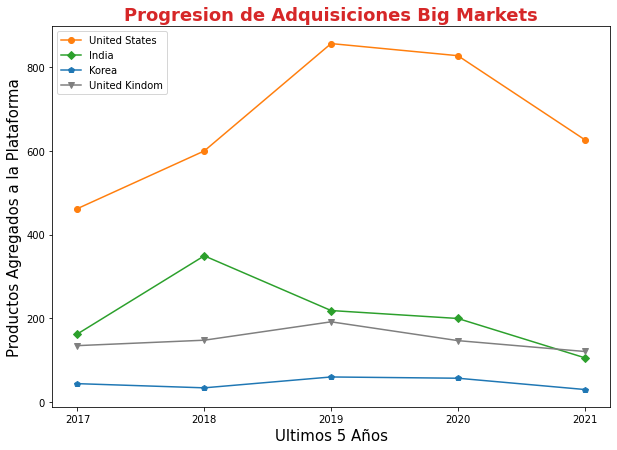

In [ ]:
dict_filtros={'pais':['United States']}
lista_columnas=['fecha_netflix']

#   Filtro los registros en base a los datos de interes, extraigo año de la Fecha de inclusion generando una nueva columna
#   limito el dataset a los mayores o iguales al año 2017 y hago que el indice sea la columna de Año
#   Luego agrupo por año y cuento los registros correspondientes
#   Finalmente asigno la transformacion realizada a un nuevo dataframe correspondiente a los datos de Estados Unidos
df_Netflix_filtrado=filtro_df(df_netflix_clean,dict_filtros,lista_columnas)
df_Netflix_filtrado['year'] = pd.DatetimeIndex(df_Netflix_filtrado['fecha_netflix']).year
df_Netflix_filtrado=df_Netflix_filtrado[df_Netflix_filtrado['year']>=2017]
df_Netflix_filtrado.set_index(['year'],inplace=True)
df_Netflix_filtrado=df_Netflix_filtrado.groupby([df_Netflix_filtrado.index]).count()

df_USA_reg=df_Netflix_filtrado


#   Idem bloque anterior para India
dict_filtros={'pais':['India']}

df_Netflix_filtrado=filtro_df(df_netflix_clean,dict_filtros,lista_columnas)
df_Netflix_filtrado['year'] = pd.DatetimeIndex(df_Netflix_filtrado['fecha_netflix']).year
df_Netflix_filtrado=df_Netflix_filtrado[df_Netflix_filtrado['year']>=2017]
df_Netflix_filtrado.set_index(['year'],inplace=True)
df_Netflix_filtrado=df_Netflix_filtrado.groupby([df_Netflix_filtrado.index]).count()

df_INDIA_reg=df_Netflix_filtrado


#   Idem bloque anterior para Korea
dict_filtros={'pais':['Korea']}

df_Netflix_filtrado=filtro_df(df_netflix_clean,dict_filtros,lista_columnas)
df_Netflix_filtrado['year'] = pd.DatetimeIndex(df_Netflix_filtrado['fecha_netflix']).year
df_Netflix_filtrado=df_Netflix_filtrado[df_Netflix_filtrado['year']>=2017]
df_Netflix_filtrado.set_index(['year'],inplace=True)
df_Netflix_filtrado=df_Netflix_filtrado.groupby([df_Netflix_filtrado.index]).count()

df_KOREA_reg=df_Netflix_filtrado


#   Idem bloque anterior para United Kingdom
dict_filtros={'pais':['United Kingdom']}

df_Netflix_filtrado=filtro_df(df_netflix_clean,dict_filtros,lista_columnas)
df_Netflix_filtrado['year'] = pd.DatetimeIndex(df_Netflix_filtrado['fecha_netflix']).year
df_Netflix_filtrado=df_Netflix_filtrado[df_Netflix_filtrado['year']>=2017]
df_Netflix_filtrado.set_index(['year'],inplace=True)
df_Netflix_filtrado=df_Netflix_filtrado.groupby([df_Netflix_filtrado.index]).count()

df_UK_reg=df_Netflix_filtrado


#   Genero el grafico con los 4 datasets
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_USA_reg['fecha_netflix'],label='United States',color="tab:orange",marker = 'o')
ax.plot(df_INDIA_reg['fecha_netflix'],label='India',color="tab:green",marker = 'D')
ax.plot(df_KOREA_reg['fecha_netflix'],label='Korea',color="tab:blue",marker = 'p')
ax.plot(df_UK_reg['fecha_netflix'],label='United Kindom',color="tab:gray",marker = 'v')
ax.set_title('Progresion de Adquisiciones Big Markets', loc = "Center", fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'tab:red'})
ax.legend(loc = 'upper left')
plt.xticks(np.arange(2017, 2022, step=1))     #Linea necesaria para que en el eje X no me genere intervalos decimales con el año
plt.xlabel("Ultimos 5 Años",fontsize=15)
plt.ylabel("Productos Agregados a la Plataforma",fontsize=15)
plt.show


### **Conclusión del Análisis: Adquisicion de productos de grandes mercados**
Claramente la percepción no coincide con la realidad. Vemos que la adquisición de las producciones coreanas se mantiene muy estable año a año.
Los mercados de Estados Unidos y Reino Unido, proporcionalmente superan a Corea en agregados a la plataforma, mientras que India comienza a tener un comportamiento contrario a los otros dos mercados anteriores, a partir de año 2018.
Finalmente podemos observar que todos los mercados decrecen a partir del año 2020, lo cual coincide con dos fenomenos diferentes: la pandemia que disminuye la produccion de contenido, y el surgimiento de nuevas plataformas de streaming, competidoras de la que estamos estudiando.

---

## **Distribución de duración de películas**

El último análisis consiste en evaluar la distribución de la duración de las películas presentes en Netflix, basandonos en la hipótesis de que este es un punto influyente en la decisión de los usuarios al momento de ver o no una película. Y por lo tanto sería determinante al momento de incorporala al catálogo.

<function matplotlib.pyplot.show>

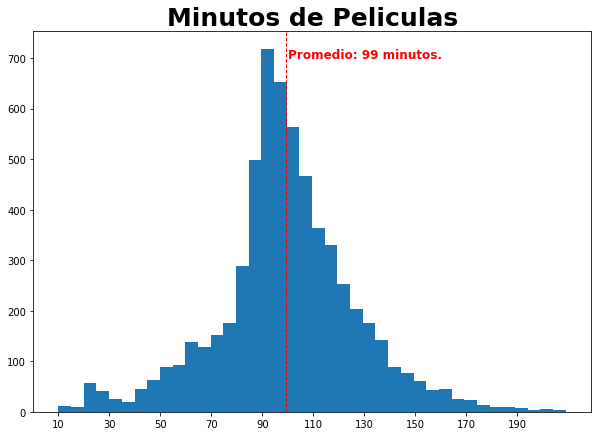

In [ ]:
#definición en variables de los datos que serán argumentos de la función 'filtro_df()'
filtros = {'tipo': ['Movie']}
columnas = ['duracion_pelicula']

#generación del DF filtrado, en este caso desde con la columna 'duracion_pelicula'
df_Netflix_filtrado = filtro_df(df_netflix_clean, filtros, columnas, None, None)
df_Netflix_filtrado.head()

#eliminación de los registros que aún poseen 'NoData' como duración
df_Netflix_filtrado.drop(df_Netflix_filtrado[df_Netflix_filtrado.duracion_pelicula == 'NoData'].index, inplace = True)

df_Netflix_filtrado['minutos'] = df_Netflix_filtrado['duracion_pelicula'].astype(int)
del df_Netflix_filtrado['duracion_pelicula']

df_minutos_pre = df_Netflix_filtrado[df_Netflix_filtrado['minutos']>=10]
df_minutos_pre
df_minutos = df_minutos_pre[df_minutos_pre['minutos']<=210]
df_minutos=df_minutos.reset_index(drop=True)

mean = round(df_minutos['minutos'].mean())

fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df_minutos['minutos'], bins = 40)
ax.set_title('Minutos de Peliculas', loc = "Center", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'k'})

ax.text(100, 700, 'Promedio: ' + str(mean) + ' minutos.', fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'r'} )
x_ticks_array=[i for i in range(10, 210, 20)]
plt.xticks(x_ticks_array)
plt.axvline(df_minutos['minutos'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.show

### **Conclusión del Análisis: Distribución de duración de películas**

Tal como esperabamos, la mayor cantidad de películas se centra en un intervalo de entre 80 y 110 minutos de duración. Obtuvimos un promedio de duración de 99 minutos, lo cuál consideramos que es lo esperado por los usuarios en una película.
Si bien Netflix cuenta con la presencia de películas de más de dos horas estas son minoritarias. 

---

## **Conclusión**

Luego de los diferentes análisis realizados se puede inferir lo siguiente:

*   Hubo un descenso en cuanto en la incorporación de series y películas durante la pandemia de Covid-19. Sospechamos que esto no se debe a que el mercado se vio afectado, sino que surgieron nuevas plataformas competidoras de Netflix en los ultimos años y esto podría explicar el patrón obtenido. Para corroborar esto sería necesario evaular los mismos datos en bases de las demás plataformas.
*   El mercado con más presencia en Netflix corresponde a Estados Unidos, seguido por India y Reino Unido. Sin embargo, India concentra mayor representatividad en cuanto a actores, por lo que sospechamos que un puñado de actores de nacionalidad india participan en la mayoría de las películas. Adicionalmente, si bien es un hecho que el mercado en Corea del Sur está creciendo, esto no fue apreciable en los datos obtenidos.
*   La media en la duración de películas es de 99 minutos, siento que la mayor cantidad de la muestra se encuentra en el intervalo de 80-110 minutos. A pesar de esto, un próximo análisis podría hacerce discriminando los paises para corroborar si esta tendencia es global, o cada mercado tiene una media de duración diferente.
*   La cantidad de series con una sola temporada, que consideramos discontinuadas, aumenta considerablemente a traves de los años. Esto podría deberse a un aumento en la cantidad de producciónes para satisfacer los requerimientos de distintos tipos de usuarios, y que luego se abandonan por falta de audiencia, costos, o problemas de producción.
*   Finalmente, acotandonos a películas y series donde Argentina participa en la producción, no es significativa en cuanto a presencia en Netflix comparando a los mercádos líderes.










## **Almacenamiento de resultados**

Definimos una función que recibe un DataFrame y un nombre de archivo para almacenar dicho DF en formato Json.

In [ ]:
#Se guarda df en archivo JSON
def Guardarcsv(df_param,FileName):
  df_param.to_(r''+FileName+'.json',orient='index')

GuardarJsonFile(df_netflix_clean,'./sample_data/Netflix_Grupo3')
